# 1. Introduccion
### En este cuaderno vamos a practicar haciendo dos redes neuronales convolucionales a un dataset de imágenes:
* https://www.kaggle.com/datasets/stealthknight/bird-vs-drone/data (clasificación binaria)
### Este dataset como veremos a continuación, contiene ejemplos de imágenes divididos en 3 carpetes (entrenamiento, test, validacion) tanto de pájaros como de drones y nuestro deber será intentar crear un modelo que nos ayude a diferenciar entre clases.

# 2. Clasificación Binaria (Bird VS Drone)

## 2.1 Importamos el dataset

In [1]:
import kagglehub
import os

# Descargar el dataset desde KaggleHub
print("Descargando el dataset Bird vs Drone...")
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")
print("Dataset descargado en:", path)

c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Descargando el dataset Bird vs Drone...
Dataset descargado en: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1


In [2]:
import os

# Mostrar la estructura de directorios para verificar la descarga y ver como añadir las etiquetas a los datos en pasos posteriores
print("Estructura del directorio:")
for root, dirs, files in os.walk(path):
    print(f"\nCarpeta: {root}")
    for file in files[5:]:
        print(f"  - {file}")

Estructura del directorio:

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test\images
  - BT (103).jpg
  - BT (104).jpg
  - BT (105).jpg
  - BT (106).jpg
  - BT (107).jpg
  - BT (108).jpg
  - BT (109).jpg
  - BT (11).jpg
  - BT (110).jpg
  - BT (111).jpg
  - BT (112).jpg
  - BT (113).jpg
  - BT (114).jpg
  - BT (115).jpg
  - BT (116).jpg
  - BT (117).jpg
  - BT (118).jpg
  - BT (119).jpg
  - BT (12).jpg
  - BT (120).jpg
  - BT (121).jpg
  - BT (122).jpg
  - BT (123).jpg
  - BT (124).jpg
  - BT (125).jpg
  - BT (126).jpg
  - BT (127).jpg
  - BT (128).jpg
  - BT (129).jpg
  - BT (13).jpg
  - BT (130).jpg
  - BT (131).jpg
  - BT (132).jpg
  - BT (133).j

### dataset está organizado de esta manera (ejemplo):
* BTR (para las imagenes de pajaros training)
* DTR (para las imagenes de drones training)
* BV (para las imagenes de pajaros validacion)
* DV (para las imagenes de drones validacion)
* DT (para las imagenes de drones test)
* BT (para las imagenes de pájaros test)

In [3]:
print("Ruta base del dataset descargado:", path)

Ruta base del dataset descargado: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1


## 2.2 Definimos las rutas de la carpetas

In [4]:
import os

# Construir rutas dinámicamente basadas en la ruta descargada
train_images_path = os.path.join(path, "Dataset", "train", "images")
valid_images_path = os.path.join(path, "Dataset", "valid", "images")
test_images_path = os.path.join(path, "Dataset", "test", "images")

# Verificar las rutas
print("Ruta de entrenamiento:", train_images_path)
print("Ruta de validación:", valid_images_path)
print("Ruta de prueba:", test_images_path)

Ruta de entrenamiento: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\train\images
Ruta de validación: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\valid\images
Ruta de prueba: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test\images


## 2.3 Obtenemos y contamos imágenes por clase

In [5]:
from glob import glob
from collections import Counter

# Obtener listas de imágenes
train_images = glob(os.path.join(train_images_path, "*.jpg"))
valid_images = glob(os.path.join(valid_images_path, "*.jpg"))
test_images = glob(os.path.join(test_images_path, "*.jpg"))
# Verificar las primeras imágenes para asegurarnos de que las rutas y nombres son correctos
print("Primeras imágenes de entrenamiento:")
print(train_images[:5])  # Mostrar las primeras 5 imágenes de entrenamiento
print("Primeras imágenes de validación:")
print(valid_images[:5])  # Mostrar las primeras 5 imágenes de validación
print("Primeras imágenes de test:")
print(test_images[:5])  # Mostrar las primeras 5 imágenes de test

# Función para asignar etiquetas según el nombre del archivo
def asignar_etiqueta(imagen):
    if 'BTR' in imagen:  # Pájaro en entrenamiento
        return 'pajaro'
    elif 'DTR' in imagen:  # Dron en entrenamiento
        return 'dron'
    elif 'BV' in imagen:  # Pájaro en validación
        return 'pajaro'
    elif 'DV' in imagen:  # Dron en validación
        return 'dron'
    elif 'BT' in imagen:  # Pájaro en test
        return 'pajaro'
    elif 'DT' in imagen:  # Dron en test
        return 'dron'
    else:
        return None  # Eliminamos cualquier archivo sin etiqueta válida

# Asignar etiquetas
train_labels = [asignar_etiqueta(img) for img in train_images]
valid_labels = [asignar_etiqueta(img) for img in valid_images]
test_labels = [asignar_etiqueta(img) for img in test_images]

# Eliminar cualquier imagen que no haya sido etiquetada correctamente
train_images = [img for img, label in zip(train_images, train_labels) if label is not None]
train_labels = [label for label in train_labels if label is not None]
test_images = [img for img, label in zip(test_images, test_labels) if label is not None]
test_labels = [label for label in test_labels if label is not None]

valid_images = [img for img, label in zip(valid_images, valid_labels) if label is not None]
valid_labels = [label for label in valid_labels if label is not None]

# Contar la cantidad de imágenes por clase
contador_train = Counter(train_labels)
contador_valid = Counter(valid_labels)
contador_test = Counter(test_labels)

# Verificar la cantidad de imágenes por clase
print("Cantidad de imágenes por clase (Entrenamiento):", contador_train)
print("Cantidad de imágenes por clase (Validación):", contador_valid)
print("Cantidad de imágenes por clase (Test):", contador_test)

Primeras imágenes de entrenamiento:
['C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (10).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (100).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1000).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1001).jpg']
Primeras imágenes de validación:
['C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\valid\\images\\BV (1).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\valid\\images\\BV (10).jpg', 'C:\\Users\\domid\

## 2.4 Mostramos algunas imágenes aleatorias de entrenamiento y validación

Imágenes de Dron (entrenamiento): 10934
Imágenes de Pájaro (entrenamiento): 7389
Imágenes de Dron (validación): 1039
Imágenes de Pájaro (validación): 701
Imágenes de Dron (prueba): 528
Imágenes de Pájaro (prueba): 361


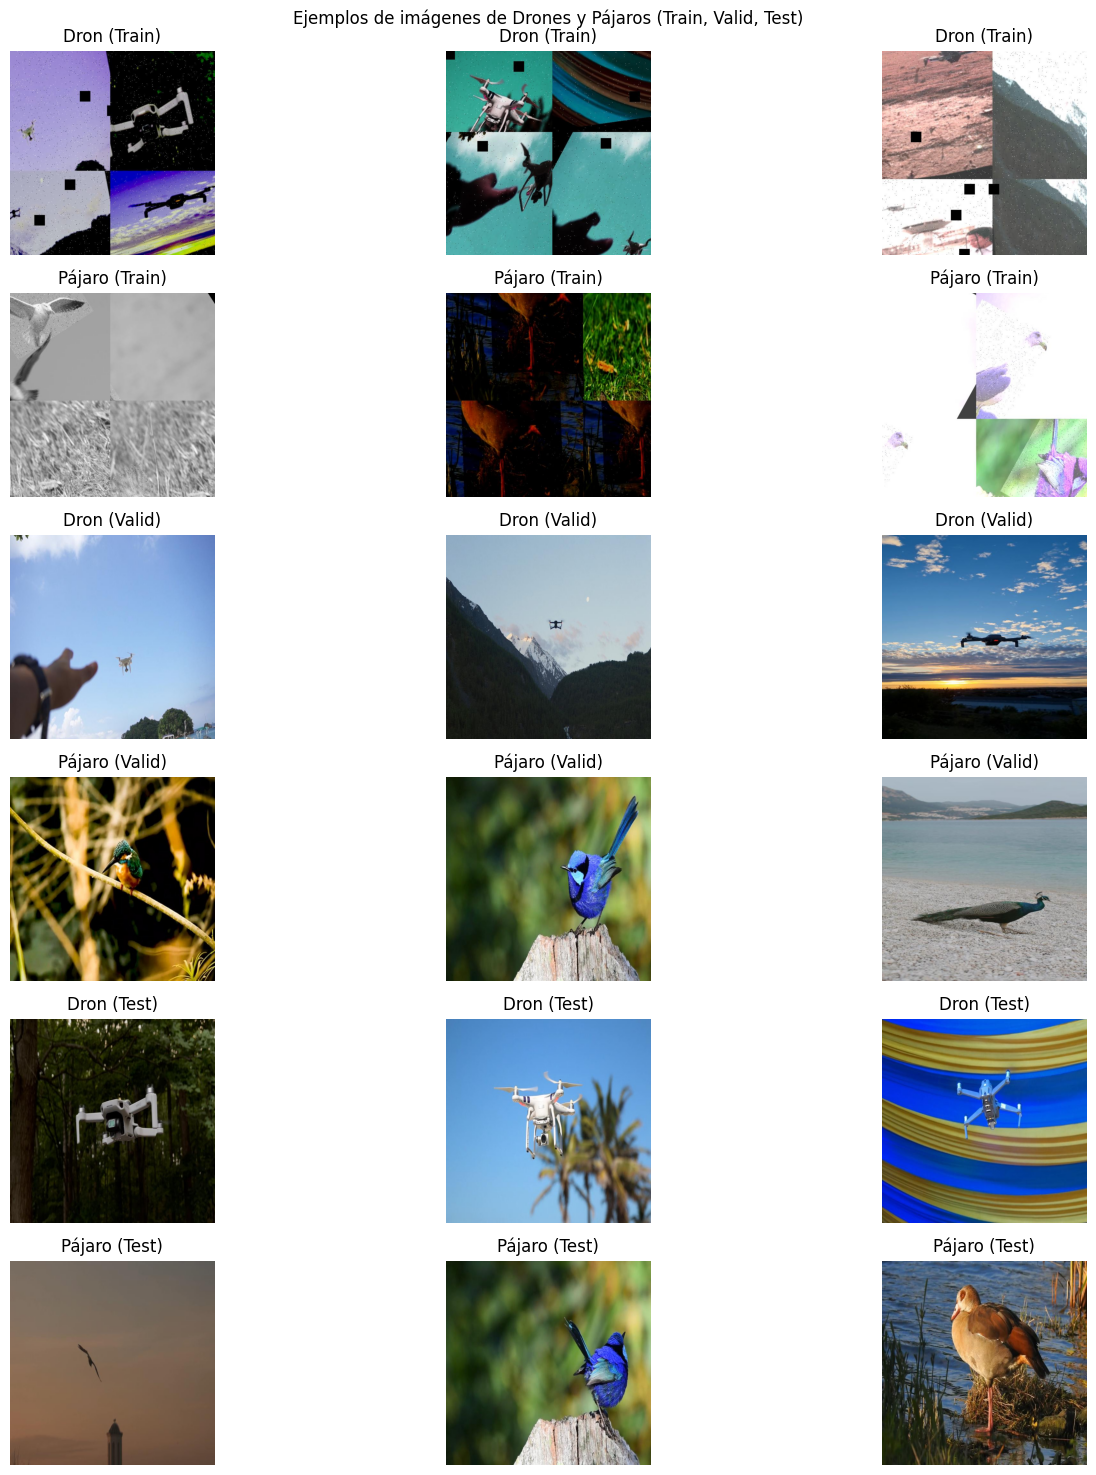

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Función para mostrar imágenes de cada clase (dron y pájaro) de entrenamiento, validación y prueba
def mostrar_imagenes_por_clase(imagenes_train, etiquetas_train, imagenes_valid, etiquetas_valid, imagenes_test, etiquetas_test, n=3):
    # Filtrar imágenes de cada clase en entrenamiento
    drones_train = [img for img, etiqueta in zip(imagenes_train, etiquetas_train) if etiqueta == 'dron']
    pajaros_train = [img for img, etiqueta in zip(imagenes_train, etiquetas_train) if etiqueta == 'pajaro']

    # Filtrar imágenes de cada clase en validación
    drones_valid = [img for img, etiqueta in zip(imagenes_valid, etiquetas_valid) if etiqueta == 'dron']
    pajaros_valid = [img for img, etiqueta in zip(imagenes_valid, etiquetas_valid) if etiqueta == 'pajaro']

    # Filtrar imágenes de cada clase en prueba
    drones_test = [img for img, etiqueta in zip(imagenes_test, etiquetas_test) if etiqueta == 'dron']
    pajaros_test = [img for img, etiqueta in zip(imagenes_test, etiquetas_test) if etiqueta == 'pajaro']

    # Mostrar cuántas imágenes hay de cada clase
    print(f"Imágenes de Dron (entrenamiento): {len(drones_train)}")
    print(f"Imágenes de Pájaro (entrenamiento): {len(pajaros_train)}")
    print(f"Imágenes de Dron (validación): {len(drones_valid)}")
    print(f"Imágenes de Pájaro (validación): {len(pajaros_valid)}")
    print(f"Imágenes de Dron (prueba): {len(drones_test)}")
    print(f"Imágenes de Pájaro (prueba): {len(pajaros_test)}")

    # Seleccionar imágenes aleatorias
    seleccion_drones_train = random.sample(drones_train, min(len(drones_train), n))
    seleccion_pajaros_train = random.sample(pajaros_train, min(len(pajaros_train), n))
    seleccion_drones_valid = random.sample(drones_valid, min(len(drones_valid), n))
    seleccion_pajaros_valid = random.sample(pajaros_valid, min(len(pajaros_valid), n))
    seleccion_drones_test = random.sample(drones_test, min(len(drones_test), n))
    seleccion_pajaros_test = random.sample(pajaros_test, min(len(pajaros_test), n))

    # Mostrar las imágenes
    plt.figure(figsize=(15, 15))

    # Imágenes de entrenamiento
    for i, img_path in enumerate(seleccion_drones_train):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 1)
        plt.imshow(img)
        plt.title(f"Dron (Train)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_train):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Train)")
        plt.axis('off')

    # Imágenes de validación
    for i, img_path in enumerate(seleccion_drones_valid):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 2 * n + 1)
        plt.imshow(img)
        plt.title(f"Dron (Valid)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_valid):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 3 * n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Valid)")
        plt.axis('off')

    # Imágenes de prueba
    for i, img_path in enumerate(seleccion_drones_test):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 4 * n + 1)
        plt.imshow(img)
        plt.title(f"Dron (Test)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_test):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 5 * n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Test)")
        plt.axis('off')

    plt.suptitle(f"Ejemplos de imágenes de Drones y Pájaros (Train, Valid, Test)")
    plt.tight_layout()
    plt.show()

# Mostrar 3 imágenes de cada clase en los tres conjuntos
mostrar_imagenes_por_clase(train_images, train_labels, valid_images, valid_labels, test_images, test_labels, n=3)

## 2.5 Modelo de Red Neuronal Convolucional (CNN)

### 2.5.0 Métricas para clasificación binaria

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def mostrar_metricas_clasificacion(y_true, y_pred, es_probabilidades=False, umbral=0.5):
    """
    Calcula y muestra las métricas más importantes para clasificación binaria.

    Parámetros:
    - y_true: Valores reales (array-like).
    - y_pred: Valores predichos por el modelo (array-like).
    - es_probabilidades: Indica si y_pred son probabilidades continuas (True) o etiquetas binarias (False).
    - umbral: Umbral para convertir probabilidades en etiquetas binarias (si es_probabilidades=True).
    """
    # Convertir probabilidades a etiquetas binarias si es necesario
    if es_probabilidades:
        y_pred = (y_pred > umbral).astype(int)

    # Calcular métricas
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matriz_conf = confusion_matrix(y_true, y_pred)

    # Mostrar métricas
    print("Métricas de Clasificación Binaria:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nMatriz de Confusión:")
    print(matriz_conf)

### 2.5.1 Carga y preprocesamiento de las imágenes de entrenamiento, validación y prueba

In [8]:
import tensorflow as tf

# Crear datasets a partir de las rutas y etiquetas
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Función para cargar, preprocesar imágenes y convertir etiquetas
def load_and_preprocess_image(path, label):
    # Leer y procesar la imagen
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    
    # Convertir etiquetas de texto a números (dron = 1, pajaro = 0)
    label = tf.where(label == 'dron', 1, 0)
    return image, tf.cast(label, tf.int32)

# Aplicar el preprocesamiento a los datasets
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Configurar los datasets (barajar, agrupar en lotes y prefetch)
batch_size = 32
train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_ds = valid_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Verificar el tamaño de los datasets
print(f'Tamaño del dataset de entrenamiento: {len(list(train_ds))} lotes')
print(f'Tamaño del dataset de validación: {len(list(valid_ds))} lotes')
print(f'Tamaño del dataset de prueba: {len(list(test_ds))} lotes')

Tamaño del dataset de entrenamiento: 573 lotes
Tamaño del dataset de validación: 55 lotes
Tamaño del dataset de prueba: 28 lotes


In [9]:
# Verificar algunos ejemplos del dataset de entrenamiento
for image, label in train_ds.take(5):  # Tomar 5 ejemplos
    print(f"Imagen: {image.numpy().shape}, Etiqueta: {label.numpy()}")

Imagen: (32, 224, 224, 3), Etiqueta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Imagen: (32, 224, 224, 3), Etiqueta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Imagen: (32, 224, 224, 3), Etiqueta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Imagen: (32, 224, 224, 3), Etiqueta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Imagen: (32, 224, 224, 3), Etiqueta: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 2.5.2 Definimos el modelo

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo de red neuronal convolucional con mejoras
modelo = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),

    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Aumentar Dropout para mayor regularización

    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Cuarta capa convolucional adicional
    layers.Conv2D(256, (3, 3), activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Capa densa
    layers.Flatten(),
    layers.Dense(128, activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.5),

    # Capa de salida
    layers.Dense(1, activation='sigmoid')  
])

# Compilar el modelo con un learning rate ajustado
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo para verificar la estructura
modelo.summary()

c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           51

 Total params: 5,109,697 (19.49 MB)

 Trainable params: 5,108,481 (19.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

### Dado que los datos de entrenamiento estar desbalanceados entre las clases (dron y pájaro), es una buena práctica calcular los pesos de las clases antes de entrenar el modelo. Esto ayudará al modelo a no sesgarse hacia la clase mayoritaria.

In [11]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extraer las etiquetas del dataset de entrenamiento
train_labels_list = [label.numpy() for _, label in train_ds.unbatch()]

# Calcular los pesos de las clases
class_weights = compute_class_weight(
    class_weight='balanced',  # Ajustar los pesos de forma balanceada
    classes=np.unique(train_labels_list),  # Clases únicas (0 para pájaro, 1 para dron)
    y=train_labels_list  # Etiquetas de entrenamiento
)

# Convertir a un diccionario
class_weights = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weights)

Pesos de las clases: {0: np.float64(1.2398836107727704), 1: np.float64(0.8378909822571794)}


### 2.5.3 Entrenamiento del modelo

In [12]:
# Entrenar el modelo
historial = modelo.fit(
    train_ds,  # Usar etiquetas numéricas (0 o 1)
    epochs=4,  # Número de épocas
    batch_size=32,  # Tamaño del batch
    validation_data=valid_ds,  # Usar las etiquetas numéricas de validación
    class_weight=class_weights  # Usar los pesos de las clases por desbalanceo
)

Epoch 1/4
189/573 ━━━━━━━━━━━━━━━━━━━━ 10:47 2s/step - accuracy: 0.4625 - loss: 1.1643

KeyboardInterrupt: 

### 2.5.4 Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(test_ds, verbose=2)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

14/14 - 4s - 291ms/step - accuracy: 0.5939 - loss: 0.6946
Pérdida en el conjunto de prueba: 0.6946364641189575
Precisión en el conjunto de prueba: 0.5939257740974426


### 2.5.5 Visualizamos el rendimiento (Perdida y precision) y matriz de confusión

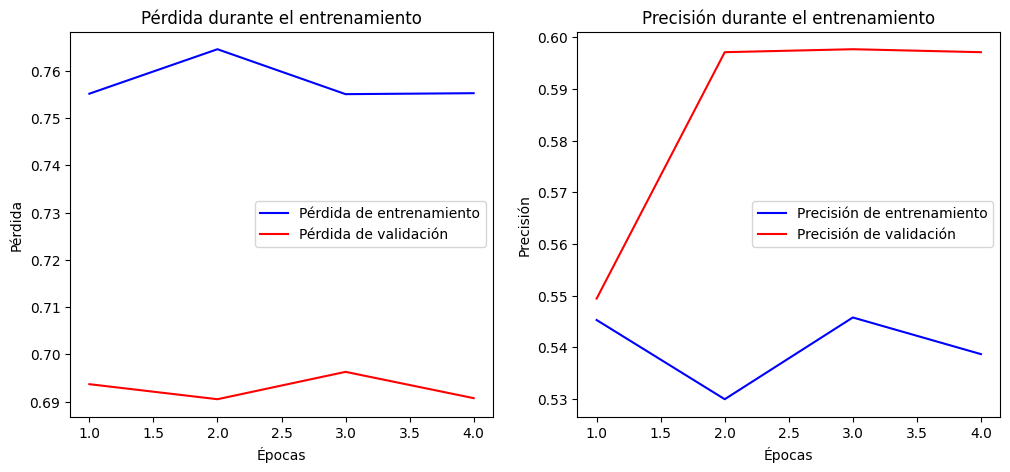

In [ ]:
import matplotlib.pyplot as plt

# Obtener el rango de épocas
epochs = range(1, len(historial.history['loss']) + 1)

# Crear la figura con subgráficas
plt.figure(figsize=(12, 5))

# Gráfica de Pérdida
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera posición
plt.plot(epochs, historial.history['loss'], 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, historial.history['val_loss'], 'r', label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

# Gráfica de Precisión
plt.subplot(1, 2, 2)  # Segunda posición
plt.plot(epochs, historial.history['accuracy'], 'b', label='Precisión de entrenamiento')
plt.plot(epochs, historial.history['val_accuracy'], 'r', label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

# Mostrar las gráficas
plt.show()

14/14 - 4s - 297ms/step - accuracy: 0.5939 - loss: 0.6946
Pérdida en el conjunto de prueba: 0.6946364641189575
Precisión en el conjunto de prueba: 0.5939257740974426
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step


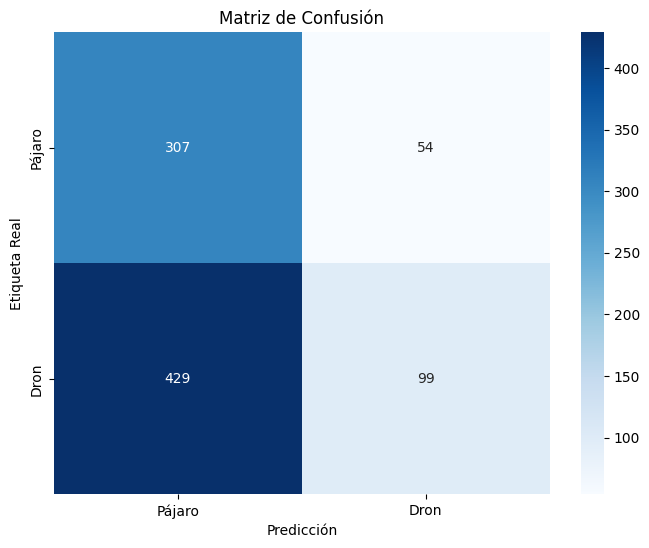

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo y generar predicciones
test_loss, test_accuracy = modelo.evaluate(test_ds, verbose=2)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Generar predicciones y etiquetas reales desde el dataset de prueba
y_pred = modelo.predict(test_ds)  # Predicciones continuas
y_pred_binarias = (y_pred > 0.7).astype(int).flatten()  # Aplicar el umbral y aplanar

# Extraer etiquetas reales del dataset
y_true = [label.numpy() for _, label in test_ds.unbatch()]

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_true, y_pred_binarias)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Pájaro', 'Dron'], yticklabels=['Pájaro', 'Dron'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
mostrar_metricas_clasificacion(y_true, y_pred)

# 3. transfer learning
### Vamos a elegir **EfficientNetB0**
* Es compatible con nuestro preprocesamiento (normalización en [0, 1]).
* Es eficiente en términos de recursos computacionales. Tiene 5.3M de parámetros que aunque parecen mucho, hay modelos que usan mas de 100M
* Si buscamos escalabilidad, tenemos hasta 7 versiones más (EfficientNetB0 ... EfficientNetB7) con las que podríamos ir probando manteniendo los mismos datasets.
* Tiene un rendimiento probado gracias a su preentrenamiento en ImageNet. (Tiene aprendido las características generales que pueden ayudar a diferenciar entre imágenes, tales como, bordes, texturas y formas)
* Es fácil de integrar y personalizar para nuestro problema de clasificación binaria. (permite personalizar con capas como GlobalAveragePooling2D y Dense)

### 3.1 Implementar el modelo preentrenado

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar el modelo base preentrenado
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Desbloquear las últimas capas del modelo base (para que pueda entrenarse con nuestros datos)
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Congelar solo las primeras capas
    layer.trainable = False

# Definir el modelo de transferencia
modelo_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),  # Aumentar la capacidad
    layers.Dropout(0.6),  # Aumentar el Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo con un learning rate ajustado
modelo_transfer.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Aumentar ligeramente el learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
modelo_transfer.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,410,532 (16.82 MB)

 Trainable params: 2,887,825 (11.02 MB)

 Non-trainable params: 1,522,707 (5.81 MB)

### 3.2 Preprocesar las imágenes

In [ ]:
# No necesitamos preprocesar, nos vale con nuestros datasets que hemos usado antes para el anterior modelo, EfficientNetB0
#  es compatible con los datos que ya tenemos
# lo que si añadiremos data augmentation (a la clase con menos datos) para evitar el sobreajuste, esta vez no utilizaremos class_weight
batch_size = 64  # Tamaño del batch para EfficientNetB0
# Definir las transformaciones de data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Preprocesar las imágenes y aplicar data augmentation
def preprocess_and_augment(image, label):
    # Leer y procesar la imagen
    image = tf.io.read_file(image)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    
    # Aplicar data augmentation
    image = data_augmentation(image)
    
    # Convertir etiquetas de texto a números (dron = 1, pajaro = 0)
    label = tf.where(label == b'dron', 1, 0)
    return image, tf.cast(label, tf.int32)

# Modificar el dataset de entrenamiento para incluir shuffle, preprocesamiento y data augmentation
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_images))  # Barajar las imágenes
train_ds = train_ds.map(preprocess_and_augment, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Preprocesar los conjuntos de validación y prueba (sin shuffle ni data augmentation)
def preprocess(image, label):
    image = tf.io.read_file(image)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    
    # Convertir etiquetas de texto a números (dron = 1, pajaro = 0)
    label = tf.where(label == b'dron', 1, 0)
    return image, tf.cast(label, tf.int32)

valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
valid_ds = valid_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Verificar las etiquetas después de aplicar shuffle
for image, label in train_ds.take(5):
    print(f"Etiqueta: {label.numpy()}")  # Deberías ver una mezcla de 0 y 1

Etiqueta: [1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0]
Etiqueta: [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
Etiqueta: [1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1]
Etiqueta: [1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0]
Etiqueta: [1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
from collections import Counter

# Contar las etiquetas en el conjunto de entrenamiento
train_labels_list = [label.numpy() for _, label in train_ds.unbatch()]
contador_train = Counter(train_labels_list)
print("Distribución de clases en el conjunto de entrenamiento:", contador_train)

Distribución de clases en el conjunto de entrenamiento: Counter({np.int32(1): 10934, np.int32(0): 7389})


### 3.3 Entrenar el modelo

In [ ]:
# Entrenar el modelo de transferencia sin class_weight
historial_transfer = modelo_transfer.fit(
    train_ds,  # Dataset de entrenamiento con data augmentation
    epochs=4,  # Número de épocas
    validation_data=valid_ds,  # Dataset de validación
    batch_size=batch_size  # Tamaño del batch (64)
)

Epoch 1/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 267s 893ms/step - accuracy: 0.5530 - loss: 0.6963 - val_accuracy: 0.5971 - val_loss: 0.6913
Epoch 2/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 251s 873ms/step - accuracy: 0.5823 - loss: 0.6776 - val_accuracy: 0.5971 - val_loss: 0.6768
Epoch 3/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 252s 879ms/step - accuracy: 0.5922 - loss: 0.6761 - val_accuracy: 0.5971 - val_loss: 0.6753
Epoch 4/4
287/287 ━━━━━━━━━━━━━━━━━━━━ 259s 903ms/step - accuracy: 0.5987 - loss: 0.6704 - val_accuracy: 0.5971 - val_loss: 0.6747


### 3.4 Evaluar el modelo

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_transfer.evaluate(test_ds, verbose=2)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

14/14 - 9s - 622ms/step - accuracy: 0.5939 - loss: 0.6767
Pérdida en el conjunto de prueba: 0.6766581535339355
Precisión en el conjunto de prueba: 0.5939257740974426


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step


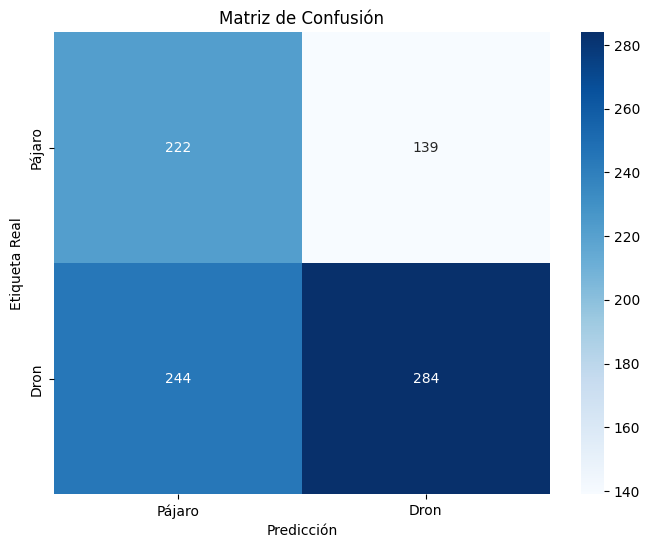

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones del modelo
y_pred = modelo_transfer.predict(test_ds)  # Predicciones continuas
y_pred_binarias = (y_pred > 0.8).astype(int)  # Convertir a etiquetas binarias (0 o 1)

# Extraer etiquetas reales del dataset
y_true = [label.numpy() for _, label in test_ds.unbatch()]

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_true, y_pred_binarias)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Pájaro', 'Dron'], yticklabels=['Pájaro', 'Dron'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Mostrar métricas
mostrar_metricas_clasificacion(y_true, y_pred, es_probabilidades=True, umbral=0.8)

Métricas de Clasificación Binaria:
Accuracy: 0.4061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Matriz de Confusión:
[[361   0]
 [528   0]]


c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
